# US Fair Market Rents Data
_[Data from HUD Office of Policy Development and Research](https://www.huduser.gov/portal/datasets/fmr.html#history)_

## Purpose
The purpose of this analysis is to see trends in rent prices across Metropolitan Statistical Areas in the USA. Also, I hope to practice data cleaning techniques. This dataset has lots of textual columns that need to be cleaned in order to see changes over time.

## About the data
Here are the meanings of some of the columns present in the data:
- `areaname`: geographic area name
- `cntyname`: county name
- `pmsaname`: primary metropolitan statistical area name
- `fmrxx_y`: xx represents year; y represents number of bedrooms ranging from 0(efficiency) to 4 bedrooms
- `fmr_area`: shows the fmr percentile measured
- `pop2017`: estimated population 2017
- `pop2000`: population from 2000 census



### Import data

In [1]:
import numpy as np
import pandas as pd

In [2]:
rent_prices = pd.read_csv('rent_prices.csv')
rent_prices.head(3)

,fips2010,fips2000,areaname22,name,msa22,fmr22_0,fmr22_1,fmr22_2,fmr22_3,fmr22_4,...,pop2010,fmr_area,census_region,pmsaname,cntyname,pop2017,pop2000,id_agis3,id_agis2,id
0,100199999.0,100199999.0,"Montgomery, AL MSA",Autauga County,METRO33860M33860,643.0,764.0,914.0,1156.0,1494.0,...,54571.0,5240.0,3.0,"Montgomery, AL MSA",Autauga County,55035.0,43671.0,MSA5240,MSA5240,100000001.0
1,100399999.0,100399999.0,"Daphne-Fairhope-Foley, AL MSA",Baldwin County,METRO19300M19300,772.0,777.0,1017.0,1348.0,1715.0,...,182265.0,5160.0,3.0,"Mobile, AL MSA",Baldwin County,203360.0,140415.0,MSA5160,MSA5160,100000003.0
2,100599999.0,100599999.0,"Barbour County, AL",Barbour County,NCNTY01005N01005,532.0,536.0,705.0,871.0,980.0,...,27457.0,10000005.0,3.0,"Barbour County, AL",Barbour County,26200.0,29038.0,CNTY01005,CNTY01005,100000005.0


### Delete unneeded rows

We only need the district information and the historical rent prices. The rent prices columns all start with fmr. We need to see all the columns that don't start with fmr so that we can know the columns that will be dropped.

In [3]:
to_be_dropped = [columns for columns in rent_prices.columns if not (columns.startswith('fmr'))]
print (to_be_dropped)

['fips2010', 'fips2000', 'areaname22', 'name', 'msa22', 'msa21', 'msa20', 'msa19', 'msa18', 'msa17', 'msa16', 'msa15', 'msa14', 'msa13', 'msa12', 'msa11', 'msa10', 'msa09', 'msa08', 'msa07', 'msa06', 'msa05', 'msa04', 'msa03', 'msa02', 'msa01', 'msa00', 'msa99', 'msa98', 'msa97', 'msa96', 'msa95', 'msa94', 'msa93', 'msa92', 'msa91', 'msa90', 'msa89', 'msa88', 'msa87', 'msa86', 'msa85', 'msa83', 'cbsasub', 'areaname', 'state', 'cousub', 'msa', 'county', 'pop2010', 'census_region', 'pmsaname', 'cntyname', 'pop2017', 'pop2000', 'id_agis3', 'id_agis2', 'id']


Let's take a peep at the columns that we want to drop

In [4]:
rent_prices[['areaname','state','cousub','county','census_region',
             'pmsaname','cntyname','areaname22','name','cbsasub']].head()

,areaname,state,cousub,county,census_region,pmsaname,cntyname,areaname22,name,cbsasub
0,"Montgomery, AL MSA",1.0,99999.0,1.0,3.0,"Montgomery, AL MSA",Autauga County,"Montgomery, AL MSA",Autauga County,METRO33860M33860
1,"Daphne-Fairhope-Foley, AL MSA",1.0,99999.0,3.0,3.0,"Mobile, AL MSA",Baldwin County,"Daphne-Fairhope-Foley, AL MSA",Baldwin County,METRO19300M19300
2,"Barbour County, AL",1.0,99999.0,5.0,3.0,"Barbour County, AL",Barbour County,"Barbour County, AL",Barbour County,NCNTY01005N01005
3,"Birmingham-Hoover, AL HUD Metro FMR Area",1.0,99999.0,7.0,3.0,"Bibb County, AL",Bibb County,"Birmingham-Hoover, AL HUD Metro FMR Area",Bibb County,METRO13820M13820
4,"Birmingham-Hoover, AL HUD Metro FMR Area",1.0,99999.0,9.0,3.0,"Birmingham, AL MSA",Blount County,"Birmingham-Hoover, AL HUD Metro FMR Area",Blount County,METRO13820M13820


We want to keep name, cntynme and areaname columns because they are all different identifiers for a region. This will come in handy when we compare with other datasets.

In [5]:
rent_prices.drop(columns = [col for col in rent_prices.columns if (col.startswith(('fips','msa','id','pop')))],inplace=True)
rent_prices.drop(columns = ['state','cousub','county','census_region','areaname22','cbsasub','name'],inplace=True)

The fmr columns that don't have _ represent fmr percentile and are not needed. The fmr_area column is an efficiency measurement that is not needed. We shall try to delete them before proceeding.

In [6]:
rent_prices.drop(columns = [col for col in rent_prices.columns if col.startswith('fmr') if len(col)==5], inplace=True)
rent_prices.drop(columns = 'fmr_area', inplace=True)
rent_prices.head()

,fmr22_0,fmr22_1,fmr22_2,fmr22_3,fmr22_4,fmr21_0,fmr21_1,fmr21_2,fmr21_3,fmr21_4,...,fmr85_3,fmr85_4,fmr83_0,fmr83_1,fmr83_2,fmr83_3,fmr83_4,areaname,pmsaname,cntyname
0,643.0,764.0,914.0,1156.0,1494.0,640.0,766.0,908.0,1148.0,1520.0,...,344.0,382.0,186.0,227.0,269.0,332.0,370.0,"Montgomery, AL MSA","Montgomery, AL MSA",Autauga County
1,772.0,777.0,1017.0,1348.0,1715.0,718.0,723.0,922.0,1249.0,1584.0,...,393.0,439.0,217.0,257.0,309.0,380.0,425.0,"Daphne-Fairhope-Foley, AL MSA","Mobile, AL MSA",Baldwin County
2,532.0,536.0,705.0,871.0,980.0,488.0,492.0,648.0,806.0,907.0,...,387.0,426.0,212.0,257.0,300.0,374.0,413.0,"Barbour County, AL","Barbour County, AL",Barbour County
3,765.0,820.0,943.0,1220.0,1316.0,817.0,871.0,1002.0,1303.0,1409.0,...,400.0,447.0,218.0,265.0,312.0,387.0,433.0,"Birmingham-Hoover, AL HUD Metro FMR Area","Bibb County, AL",Bibb County
4,765.0,820.0,943.0,1220.0,1316.0,817.0,871.0,1002.0,1303.0,1409.0,...,417.0,462.0,229.0,280.0,327.0,404.0,448.0,"Birmingham-Hoover, AL HUD Metro FMR Area","Birmingham, AL MSA",Blount County


### Create date columns

We should change the fmr columns into dates to better visualize the data

In [7]:
old_col = rent_prices.columns
col20s = ['20'+i[-4:] for i in [col for col in rent_prices.columns if col.startswith('fmr2')]]
col10s = ['20'+i[-4:] for i in [col for col in rent_prices.columns if col.startswith('fmr1')]]
col00s = ['20'+i[-4:] for i in [col for col in rent_prices.columns if col.startswith('fmr0')]]
col90s = ['19'+i[-4:] for i in [col for col in rent_prices.columns if col.startswith('fmr9')]]
col80s = ['19'+i[-4:] for i in [col for col in rent_prices.columns if col.startswith('fmr8')]]
new_col = col20s+col10s+col00s+col90s+col80s

rent_prices.rename(columns = dict(zip(old_col,new_col)),inplace=True)

In [8]:
rent_prices.sort_index(axis=1,ascending=False,inplace=True)
rent_prices.head(1)

,pmsaname,cntyname,areaname,2022_4,2022_3,2022_2,2022_1,2022_0,2021_4,2021_3,...,1985_4,1985_3,1985_2,1985_1,1985_0,1983_4,1983_3,1983_2,1983_1,1983_0
0,"Montgomery, AL MSA",Autauga County,"Montgomery, AL MSA",1494.0,1156.0,914.0,764.0,643.0,1520.0,1148.0,...,382.0,344.0,279.0,236.0,194.0,370.0,332.0,269.0,227.0,186.0


### Identify null values

We need to check the data for null values and see if the summary statistics make sense

In [9]:
rent_prices.describe(include='all')

,pmsaname,cntyname,areaname,2022_4,2022_3,2022_2,2022_1,2022_0,2021_4,2021_3,...,1985_4,1985_3,1985_2,1985_1,1985_0,1983_4,1983_3,1983_2,1983_1,1983_0
count,4757,4757,4766,4765.000000,4765.000000,4765.000000,4765.000000,4767.000000,4766.000000,4766.000000,...,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000
unique,2674,1959,2598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,"Boston, MA--NH PMSA",Washington County,"Boston-Cambridge-Quincy, MA-NH HUD Metro FMR Area",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,129,104,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1481.819098,1288.199161,991.092760,793.927177,724.395930,1436.278011,1251.494964,...,487.260556,440.175048,355.002122,302.735837,252.638659,470.164439,423.733927,340.182050,289.234670,240.780182
std,NaN,NaN,NaN,503.423202,433.910600,348.472099,287.402187,256.837765,514.150816,447.021624,...,95.082198,85.104521,68.198412,58.643147,51.498503,92.136759,82.302452,65.338816,55.842176,48.817816
min,NaN,NaN,NaN,574.000000,549.000000,422.000000,370.000000,356.000000,571.000000,524.000000,...,311.000000,276.000000,223.000000,186.000000,151.000000,297.000000,264.000000,212.000000,177.000000,144.000000
25%,NaN,NaN,NaN,1122.000000,1000.000000,757.000000,600.000000,555.000000,1085.000000,972.000000,...,414.000000,373.000000,302.000000,254.000000,209.000000,398.000000,359.000000,289.000000,243.000000,200.000000
50%,NaN,NaN,NaN,1313.000000,1130.000000,867.000000,699.000000,639.000000,1260.000000,1084.000000,...,466.000000,420.000000,340.000000,291.000000,248.000000,451.000000,405.000000,327.000000,277.000000,235.000000
75%,NaN,NaN,NaN,1729.000000,1472.000000,1122.000000,884.000000,811.500000,1648.000000,1404.000000,...,553.000000,495.000000,397.000000,338.000000,285.000000,535.000000,477.000000,378.000000,321.000000,267.000000


In [10]:
rent_prices.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 198 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    pmsaname  4757 non-null   object 
 1    cntyname  4757 non-null   object 
 2    areaname  4766 non-null   object 
 3    2022_4    4765 non-null   float64
 4    2022_3    4765 non-null   float64
 5    2022_2    4765 non-null   float64
 6    2022_1    4765 non-null   float64
 7    2022_0    4767 non-null   float64
 8    2021_4    4766 non-null   float64
 9    2021_3    4766 non-null   float64
 10   2021_2    4766 non-null   float64
 11   2021_1    4766 non-null   float64
 12   2021_0    4768 non-null   float64
 13   2020_4    4766 non-null   float64
 14   2020_3    4766 non-null   float64
 15   2020_2    4766 non-null   float64
 16   2020_1    4766 non-null   float64
 17   2020_0    4768 non-null   float64
 18   2019_4    4766 non-null   float64
 19   2019_3    4766 non-null   float64
 20   2019_2

In [11]:
rent_prices.shape

(4773, 198)

We can see that almost every column has a nonnull entry and we need to decide what to do with them. We can also see that the name columns have a lot of repeated values but we don't know what that means for the data yet.

**First, let's deal with the null values.**

In [12]:
rent_prices.columns[rent_prices.isnull().any()]

Index(['pmsaname', 'cntyname', 'areaname', '2022_4', '2022_3', '2022_2',
       '2022_1', '2022_0', '2021_4', '2021_3',
       ...
       '1985_4', '1985_3', '1985_2', '1985_1', '1985_0', '1983_4', '1983_3',
       '1983_2', '1983_1', '1983_0'],
      dtype='object', length=198)

Results show that each column has at least one missing value.

In [13]:
pd.options.display.min_rows = 198
rent_prices.isnull().sum()

pmsaname    16
cntyname    16
areaname     7
2022_4       8
2022_3       8
2022_2       8
2022_1       8
2022_0       6
2021_4       7
2021_3       7
2021_2       7
2021_1       7
2021_0       5
2020_4       7
2020_3       7
2020_2       7
2020_1       7
2020_0       5
2019_4       7
2019_3       7
2019_2       7
2019_1       7
2019_0       5
2018_4       7
2018_3       7
2018_2       7
2018_1       7
2018_0       5
2017_4       7
2017_3       7
            ..
1989_4      58
1989_3      58
1989_2      58
1989_1      58
1989_0      58
1988_4      58
1988_3      58
1988_2      58
1988_1      58
1988_0      58
1987_4      58
1987_3      58
1987_2      58
1987_1      58
1987_0      58
1986_4      61
1986_3      61
1986_2      61
1986_1      61
1986_0      61
1985_4      60
1985_3      60
1985_2      60
1985_1      60
1985_0      60
1983_4      60
1983_3      60
1983_2      60
1983_1      60
1983_0      60
Length: 198, dtype: int64

It looks like the number of null values per column is not a lot so they should be easy to deal with.

To be sure we'll look at the largest number of null values per column

In [14]:
rent_prices.isnull().sum().nlargest(30)

1986_4    61
1986_3    61
1986_2    61
1986_1    61
1986_0    61
1985_4    60
1985_3    60
1985_2    60
1985_1    60
1985_0    60
1983_4    60
1983_3    60
1983_2    60
1983_1    60
1983_0    60
1990_4    58
1990_3    58
1990_2    58
1990_1    58
1989_4    58
1989_3    58
1989_2    58
1989_1    58
1989_0    58
1988_4    58
1988_3    58
1988_2    58
1988_1    58
1988_0    58
1987_4    58
dtype: int64

We can see that we have over 50 null values for some years. However, we cannot see all the information at a glance because we have 198 rows which is over pandas display limits.

Let's divide the null columns into ranges so we know what we're dealing with.

In [15]:
null_cols = rent_prices.columns[rent_prices.isnull().any()]
print(str(len([col for col in null_cols if rent_prices[col].isnull().sum()>50])) + ' columns with na >50')
print(str(len([col for col in null_cols if rent_prices[col].isnull().sum()>30
              if rent_prices[col].isnull().sum()<50])) + ' columns with 30<na<50')
print(str(len([col for col in null_cols if rent_prices[col].isnull().sum()>0
              if rent_prices[col].isnull().sum()<30])) + ' columns with 0<na<30')

50 columns with na >50
60 columns with 30<na<50
88 columns with 0<na<30


### Fix null values

For the name columns, we can delete all the columns that are blank in all 3 name columns, and replace the na values in the rest with each other. 

In [16]:
#Area name has the least null values so we will fill pmsaname and cntyname with areaname.
rent_prices = rent_prices.assign(pmsaname=lambda x: np.where(x.pmsaname.isnull(),x.areaname,x.pmsaname),
                   cntyname=lambda x: np.where(x.cntyname.isnull(),x.areaname,x.cntyname))
print(rent_prices.pmsaname.isnull().sum())
print(rent_prices.cntyname.isnull().sum())
#All the name columns now have equal number of missing values which makes me suspect that they are the same rows.
#We have no need for rows with no name columns so we will drop them, but first let's check them out

7
7


All the name columns now have equal number of missing values which makes me suspect that they are the same rows.

We have no need for rows with no name columns so we will drop them, but first let's check them out

In [17]:
rent_prices[rent_prices.pmsaname.isnull()]

,pmsaname,cntyname,areaname,2022_4,2022_3,2022_2,2022_1,2022_0,2021_4,2021_3,...,1985_4,1985_3,1985_2,1985_1,1985_0,1983_4,1983_3,1983_2,1983_1,1983_0
2090,NaN,NaN,NaN,2990.0,2726.0,2205.0,1826.0,1658.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2149,NaN,NaN,NaN,2990.0,2726.0,2205.0,1826.0,1658.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2159,NaN,NaN,NaN,2505.0,2181.0,1723.0,1309.0,1145.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,935.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1081.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's see what's happening around each row

In [18]:
rent_prices.loc[2088:2092,['pmsaname','cntyname','areaname','2022_4','2022_3']]

,pmsaname,cntyname,areaname,2022_4,2022_3
2088,"Boston, MA--NH PMSA",Middlesex County,"Boston-Cambridge-Quincy, MA-NH HUD Metro FMR Area",2990.0,2726.0
2089,"Boston, MA--NH PMSA",Middlesex County,"Boston-Cambridge-Quincy, MA-NH HUD Metro FMR Area",NaN,NaN
2090,NaN,NaN,NaN,2990.0,2726.0
2091,"Lowell, MA--NH PMSA",Middlesex County,"Lowell, MA HUD Metro FMR Area",2404.0,2192.0
2092,"Boston, MA--NH PMSA",Middlesex County,"Boston-Cambridge-Quincy, MA-NH HUD Metro FMR Area",2990.0,2726.0


We need to delete the rows that have no name as they are not significant to our data.
We can also see that there are duplicated rows in the data across the entire columns and across the name columns

In [19]:
rent_prices.loc[2147:2151,['pmsaname','cntyname','areaname','2022_4','2022_3']]
#same issue as above

,pmsaname,cntyname,areaname,2022_4,2022_3
2147,"Boston, MA--NH PMSA",Norfolk County,"Boston-Cambridge-Quincy, MA-NH HUD Metro FMR Area",2990.0,2726.0
2148,"Boston, MA--NH PMSA",Norfolk County,"Boston-Cambridge-Quincy, MA-NH HUD Metro FMR Area",NaN,NaN
2149,NaN,NaN,NaN,2990.0,2726.0
2150,"Boston, MA--NH PMSA",Norfolk County,"Boston-Cambridge-Quincy, MA-NH HUD Metro FMR Area",2990.0,2726.0
2151,"Boston, MA--NH PMSA",Norfolk County,"Boston-Cambridge-Quincy, MA-NH HUD Metro FMR Area",2990.0,2726.0


In [20]:
rent_prices.loc[2157:2161,['pmsaname','cntyname','areaname','2022_4','2022_3']]
#same issue as above

,pmsaname,cntyname,areaname,2022_4,2022_3
2157,"Brockton, MA PMSA",Plymouth County,"Brockton, MA HUD Metro FMR Area",2505.0,2181.0
2158,"Brockton, MA PMSA",Plymouth County,"Brockton, MA HUD Metro FMR Area",NaN,NaN
2159,NaN,NaN,NaN,2505.0,2181.0
2160,"Brockton, MA PMSA",Plymouth County,"Brockton, MA HUD Metro FMR Area",2505.0,2181.0
2161,"Boston, MA--NH PMSA",Plymouth County,"Boston-Cambridge-Quincy, MA-NH HUD Metro FMR Area",2990.0,2726.0


In [21]:
rent_prices.loc[4767:4775,['pmsaname','cntyname','areaname','2022_4','2022_3']]
#all nan values

,pmsaname,cntyname,areaname,2022_4,2022_3
4767,"St. John/St. Thomas, VI",St. John,"St. John Island, VI",2305.0,2101.0
4768,"St. John/St. Thomas, VI",St. Thomas,"St. Thomas Island, VI",1699.0,1549.0
4769,NaN,NaN,NaN,NaN,NaN
4770,NaN,NaN,NaN,NaN,NaN
4771,NaN,NaN,NaN,NaN,NaN
4772,NaN,NaN,NaN,NaN,NaN


We drop the rows that have null values across all name columns

In [22]:
rent_prices = rent_prices.drop([2090,2149,2159,4769,4770,4771,4772])
rent_prices.tail(3)

,pmsaname,cntyname,areaname,2022_4,2022_3,2022_2,2022_1,2022_0,2021_4,2021_3,...,1985_4,1985_3,1985_2,1985_1,1985_0,1983_4,1983_3,1983_2,1983_1,1983_0
4766,"St. Croix, VI",St. Croix,"St. Croix Island, VI",1467.0,1338.0,1082.0,886.0,868.0,1410.0,1294.0,...,555.0,504.0,410.0,351.0,294.0,541.0,490.0,397.0,339.0,283.0
4767,"St. John/St. Thomas, VI",St. John,"St. John Island, VI",2305.0,2101.0,1700.0,1368.0,1154.0,2214.0,2031.0,...,662.0,595.0,487.0,418.0,352.0,648.0,581.0,473.0,405.0,340.0
4768,"St. John/St. Thomas, VI",St. Thomas,"St. Thomas Island, VI",1699.0,1549.0,1253.0,1001.0,832.0,1633.0,1498.0,...,616.0,561.0,459.0,393.0,327.0,603.0,547.0,445.0,380.0,316.0


Now it's time to delete duplicate values across the rows

In [23]:
rent_prices[rent_prices.duplicated()].shape[0]
#shows the number of duplicated rows

1470

In [24]:
rent_prices[rent_prices.duplicated(subset=['pmsaname','cntyname','areaname'])].shape[0]

1477

However the names are duplicated 7 more times and we need to delete those as well

In [25]:
rent_prices = rent_prices.drop_duplicates(subset=['pmsaname','cntyname','areaname'])
rent_prices.shape

(3289, 198)

We now have 3289 rows.

Now let's reanalyze the na values. In hindsight, this should have been done first.

For the rent prices information, missing data means that US HUDS was unable to get the data from that region or that the data does not exist. We have at most 61 missing values out of 4773. We can replace these missing values with 0. However, doing that will make calculations for average rent prices wrong. 

We will use a fillna method. However, we need to ensure that the fillna method only takes from the same year, otherwise average rent price calculations will be wrong.

**Below function ensures that fill values only belong to that year**

In [26]:
coln = rent_prices.columns
for i in coln:
    if str(i[-1])=='0':
        rent_prices.fillna(method='ffill',axis=1)
    else:
        rent_prices.fillna(method='bfill',axis=1)
rent_prices.isnull().sum()

pmsaname     0
cntyname     0
areaname     0
2022_4       0
2022_3       0
2022_2       0
2022_1       0
2022_0       0
2021_4       0
2021_3       0
2021_2       0
2021_1       0
2021_0       0
2020_4       0
2020_3       0
2020_2       0
2020_1       0
2020_0       0
2019_4       0
2019_3       0
2019_2       0
2019_1       0
2019_0       0
2018_4       0
2018_3       0
2018_2       0
2018_1       0
2018_0       0
2017_4       0
2017_3       0
            ..
1989_4      30
1989_3      30
1989_2      30
1989_1      30
1989_0      30
1988_4      30
1988_3      30
1988_2      30
1988_1      30
1988_0      30
1987_4      30
1987_3      30
1987_2      30
1987_1      30
1987_0      30
1986_4      33
1986_3      33
1986_2      33
1986_1      33
1986_0      33
1985_4      32
1985_3      32
1985_2      32
1985_1      32
1985_0      32
1983_4      32
1983_3      32
1983_2      32
1983_1      32
1983_0      32
Length: 198, dtype: int64

The function was not enough to completely remove all na values because some towns have no data available for a full year. We need to decide what to do in this case. 

We will use ffill for the remaining na values so that rent price is kept constant for areas where information is missing. We could've done this for all other na values as well since total number is not very significant for analysis. However, been very detailed is essential at this stage of learning experience.

In [27]:
rent_prices = rent_prices.fillna(method='ffill',axis=1)
rent_prices.isnull().sum()
#no more null values.

pmsaname    0
cntyname    0
areaname    0
2022_4      0
2022_3      0
2022_2      0
2022_1      0
2022_0      0
2021_4      0
2021_3      0
2021_2      0
2021_1      0
2021_0      0
2020_4      0
2020_3      0
2020_2      0
2020_1      0
2020_0      0
2019_4      0
2019_3      0
2019_2      0
2019_1      0
2019_0      0
2018_4      0
2018_3      0
2018_2      0
2018_1      0
2018_0      0
2017_4      0
2017_3      0
           ..
1989_4      0
1989_3      0
1989_2      0
1989_1      0
1989_0      0
1988_4      0
1988_3      0
1988_2      0
1988_1      0
1988_0      0
1987_4      0
1987_3      0
1987_2      0
1987_1      0
1987_0      0
1986_4      0
1986_3      0
1986_2      0
1986_1      0
1986_0      0
1985_4      0
1985_3      0
1985_2      0
1985_1      0
1985_0      0
1983_4      0
1983_3      0
1983_2      0
1983_1      0
1983_0      0
Length: 198, dtype: int64

### Reshape Data

To make meaning of our data, we need to group our data by year and bedroom types.

We can start by creating a new row for the bedroom types based on the value of the column names. 

**Below function creates a new row 'room type' just below the columns**

In [28]:
coln = rent_prices.columns
bedrm = []
for i in coln:
    if str(i[-1])=='0':
        bedrm.append('Efficiency')
    elif str(i[-1])=='1':
        bedrm.append('1-bed')
    elif str(i[-1])=='2':
        bedrm.append('2-bed')
    elif str(i[-1])=='3':
        bedrm.append('3-bed')
    elif str(i[-1])=='4':
        bedrm.append('4-bed')
    elif str(i[-1])=='e':
        bedrm.append('Room type')
rent_prices.loc[-1] = bedrm
rent_prices.index = rent_prices.index + 1
rent_prices = rent_prices.sort_index()

Now that we have the room type column, we can take out the type code from the year values.

In [29]:
new_coln = ['pmsaname','cntyname','areaname']+[col[0:4] for col in rent_prices.columns if not col.endswith('name')]
rent_prices.rename(columns = dict(zip(coln,new_coln)),inplace=True)
rent_prices.head(1)

,pmsaname,cntyname,areaname,2022,2022,2022,2022,2022,2021,2021,...,1985,1985,1985,1985,1985,1983,1983,1983,1983,1983
0,Room type,Room type,Room type,4-bed,3-bed,2-bed,1-bed,Efficiency,4-bed,3-bed,...,4-bed,3-bed,2-bed,1-bed,Efficiency,4-bed,3-bed,2-bed,1-bed,Efficiency


Our data is complicated because it has several possible indexes: year, bedroom type, pmsaname, cntyname, areaname. We have to reshape in such a way that this is effectively communicated.

We will need to have multiindexes on both rows and columns. First, I create a row index with year and bedroom type.

In [30]:
rent_prices = rent_prices.T
rent_prices.set_index([rent_prices.index,rent_prices[0]],inplace=True)
rent_prices.drop([0],axis=1,inplace=True)
rent_prices.head(10)

1                              2     \
         0                                                               
pmsaname Room type   Montgomery, AL MSA                 Mobile, AL MSA   
cntyname Room type       Autauga County                 Baldwin County   
areaname Room type   Montgomery, AL MSA  Daphne-Fairhope-Foley, AL MSA   
2022     4-bed                   1494.0                         1715.0   
         3-bed                   1156.0                         1348.0   
         2-bed                    914.0                         1017.0   
         1-bed                    764.0                          777.0   
         Efficiency               643.0                          772.0   
2021     4-bed                   1520.0                         1584.0   
         3-bed                   1148.0                         1249.0   

                                   3     \
         0                                
pmsaname Room type   Barbour County, AL   
cntyname Room type       Barbour County   
areaname Room type   Barbour County, AL   
2022     4-bed                    980.0   
         3-bed                    871.0   
         2-bed                    705.0   
         1-bed                    536.0   
         Efficiency               532.0   
2021     4-bed                    907.0   
         3-bed                    806.0   

                                                         4     \
         0                                                      
pmsaname Room type                            Bibb County, AL   
cntyname Room type                                Bibb County   
areaname Room type   Birmingham-Hoover, AL HUD Metro FMR Area   
2022     4-bed                                         1316.0   
         3-bed                                         1220.0   
         2-bed                                          943.0   
         1-bed                                          820.0   
         Efficiency                                     765.0   
2021     4-bed                                         1409.0   
         3-bed                                         1303.0   

                                                         5     \
         0                                                      
pmsaname Room type                         Birmingham, AL MSA   
cntyname Room type                              Blount County   
areaname Room type   Birmingham-Hoover, AL HUD Metro FMR Area   
2022     4-bed                                         1316.0   
         3-bed                                         1220.0   
         2-bed                                          943.0   
         1-bed                                          820.0   
         Efficiency                                     765.0   
2021     4-bed                                         1409.0   
         3-bed                                         1303.0   

                                   6                  7     \
         0                                                   
pmsaname Room type   Bullock County, AL  Butler County, AL   
cntyname Room type       Bullock County      Butler County   
areaname Room type   Bullock County, AL  Butler County, AL   
2022     4-bed                   1158.0             1043.0   
         3-bed                    968.0              871.0   
         2-bed                    783.0              705.0   
         1-bed                    602.0              619.0   
         Efficiency               589.0              530.0   
2021     4-bed                   1034.0              930.0   
         3-bed                    877.0              789.0   

                                                     8     \
         0                                                  
pmsaname Room type                       Anniston, AL MSA   
cntyname Room type                         Calhoun County   
areaname Room type   Anniston-Oxford-Jacksonville, AL MSA   
2022     4-bed   

Then, we create a column index with the town names. However, we have duplicate rows which we will proceed to delete.

In [31]:
rent_prices.columns = [rent_prices.iloc[0,:].tolist(),rent_prices.iloc[1,:].tolist(),rent_prices.iloc[2,:].tolist()]

In [32]:
rent_prices = rent_prices.drop([('pmsaname',  'Room type'),
            ('cntyname',  'Room type'),
            ('areaname',  'Room type')])
rent_prices.head(10)

Montgomery, AL MSA                Mobile, AL MSA  \
                    Autauga County                Baldwin County   
                Montgomery, AL MSA Daphne-Fairhope-Foley, AL MSA   
     0                                                             
2022 4-bed                  1494.0                        1715.0   
     3-bed                  1156.0                        1348.0   
     2-bed                   914.0                        1017.0   
     1-bed                   764.0                         777.0   
     Efficiency              643.0                         772.0   
2021 4-bed                  1520.0                        1584.0   
     3-bed                  1148.0                        1249.0   
     2-bed                   908.0                         922.0   
     1-bed                   766.0                         723.0   
     Efficiency              640.0                         718.0   

                Barbour County, AL                          Bibb County, AL  \
                    Barbour County                              Bibb County   
                Barbour County, AL Birmingham-Hoover, AL HUD Metro FMR Area   
     0                                                                        
2022 4-bed                   980.0                                   1316.0   
     3-bed                   871.0                                   1220.0   
     2-bed                   705.0                                    943.0   
     1-bed                   536.0                                    820.0   
     Efficiency              532.0                                    765.0   
2021 4-bed                   907.0                                   1409.0   
     3-bed                   806.0                                   1303.0   
     2-bed                   648.0                                   1002.0   
     1-bed                   492.0                                    871.0   
     Efficiency              488.0                                    817.0   

                                      Birmingham, AL MSA Bullock County, AL  \
                                           Blount County     Bullock County   
                Birmingham-Hoover, AL HUD Metro FMR Area Bullock County, AL   
     0                                                                        
2022 4-bed                                        1316.0             1158.0   
     3-bed                                        1220.0              968.0   
     2-bed                                         943.0              783.0   
     1-bed                                         820.0              602.0   
     Efficiency                                    765.0              589.0   
2021 4-bed                                        1409.0             1034.0   
     3-bed                                        1303.0              877.0   
     2-bed                                        1002.0              705.0   
     1-bed                                         871.0              549.0   
     Efficiency                                    817.0              532.0   

                Butler County, AL                     Anniston, AL MSA  \
                    Butler County                       Calhoun County   
                Butler County, AL Anniston-Oxford-Jacksonville, AL MSA   
     0                                                                   
2022 4-bed                 1043.0                               1111.0   
     3-bed                  871.0                                988.0   
     2-bed                  705.0                                744.0   
     1-bed                  619.0                                565.0   
     Efficiency             530.0                                562.0   
2021 4-bed                  930.0                               1094.0   
     3-bed                  789.0                                944.0   
     2-bed                  634.0  

We set names for the index and the columns so our data looks neat

In [33]:
rent_prices.index.set_names(['Year', 'Roomtype'], inplace=True)
rent_prices.columns.set_names(['pmsaname','cntyname','areaname'],inplace=True)
rent_prices.head(10)

pmsaname        Montgomery, AL MSA                Mobile, AL MSA  \
cntyname            Autauga County                Baldwin County   
areaname        Montgomery, AL MSA Daphne-Fairhope-Foley, AL MSA   
Year Roomtype                                                      
2022 4-bed                  1494.0                        1715.0   
     3-bed                  1156.0                        1348.0   
     2-bed                   914.0                        1017.0   
     1-bed                   764.0                         777.0   
     Efficiency              643.0                         772.0   
2021 4-bed                  1520.0                        1584.0   
     3-bed                  1148.0                        1249.0   
     2-bed                   908.0                         922.0   
     1-bed                   766.0                         723.0   
     Efficiency              640.0                         718.0   

pmsaname        Barbour County, AL                          Bibb County, AL  \
cntyname            Barbour County                              Bibb County   
areaname        Barbour County, AL Birmingham-Hoover, AL HUD Metro FMR Area   
Year Roomtype                                                                 
2022 4-bed                   980.0                                   1316.0   
     3-bed                   871.0                                   1220.0   
     2-bed                   705.0                                    943.0   
     1-bed                   536.0                                    820.0   
     Efficiency              532.0                                    765.0   
2021 4-bed                   907.0                                   1409.0   
     3-bed                   806.0                                   1303.0   
     2-bed                   648.0                                   1002.0   
     1-bed                   492.0                                    871.0   
     Efficiency              488.0                                    817.0   

pmsaname                              Birmingham, AL MSA Bullock County, AL  \
cntyname                                   Blount County     Bullock County   
areaname        Birmingham-Hoover, AL HUD Metro FMR Area Bullock County, AL   
Year Roomtype                                                                 
2022 4-bed                                        1316.0             1158.0   
     3-bed                                        1220.0              968.0   
     2-bed                                         943.0              783.0   
     1-bed                                         820.0              602.0   
     Efficiency                                    765.0              589.0   
2021 4-bed                                        1409.0             1034.0   
     3-bed                                        1303.0              877.0   
     2-bed                                        1002.0              705.0   
     1-bed                                         871.0              549.0   
     Efficiency                                    817.0              532.0   

pmsaname        Butler County, AL                     Anniston, AL MSA  \
cntyname            Butler County                       Calhoun County   
areaname        Butler County, AL Anniston-Oxford-Jacksonville, AL MSA   
Year Roomtype                                                            
2022 4-bed                 1043.0                               1111.0   
     3-bed                  871.0                                988.0   
     2-bed                  705.0                                744.0   
     1-bed                  619.0                                565.0   
     Efficiency             530.0                                562.0   
2021 4-bed                  930.0                               1094.0   
     3-bed                  789.0                                944.0   
     2-bed         

Lastly, we can see that our data is missing values for the year 1984. Time to start analysis is not really crucial for this project, so we can skip 1983 and start our analysis from the year 1985.

In [34]:
rent_prices.tail(10)

pmsaname        Montgomery, AL MSA                Mobile, AL MSA  \
cntyname            Autauga County                Baldwin County   
areaname        Montgomery, AL MSA Daphne-Fairhope-Foley, AL MSA   
Year Roomtype                                                      
1985 4-bed                   382.0                         439.0   
     3-bed                   344.0                         393.0   
     2-bed                   279.0                         320.0   
     1-bed                   236.0                         267.0   
     Efficiency              194.0                         226.0   
1983 4-bed                   370.0                         425.0   
     3-bed                   332.0                         380.0   
     2-bed                   269.0                         309.0   
     1-bed                   227.0                         257.0   
     Efficiency              186.0                         217.0   

pmsaname        Barbour County, AL                          Bibb County, AL  \
cntyname            Barbour County                              Bibb County   
areaname        Barbour County, AL Birmingham-Hoover, AL HUD Metro FMR Area   
Year Roomtype                                                                 
1985 4-bed                   426.0                                    447.0   
     3-bed                   387.0                                    400.0   
     2-bed                   311.0                                    323.0   
     1-bed                   267.0                                    275.0   
     Efficiency              221.0                                    227.0   
1983 4-bed                   413.0                                    433.0   
     3-bed                   374.0                                    387.0   
     2-bed                   300.0                                    312.0   
     1-bed                   257.0                                    265.0   
     Efficiency              212.0                                    218.0   

pmsaname                              Birmingham, AL MSA Bullock County, AL  \
cntyname                                   Blount County     Bullock County   
areaname        Birmingham-Hoover, AL HUD Metro FMR Area Bullock County, AL   
Year Roomtype                                                                 
1985 4-bed                                         462.0              382.0   
     3-bed                                         417.0              344.0   
     2-bed                                         339.0              279.0   
     1-bed                                         291.0              236.0   
     Efficiency                                    238.0              194.0   
1983 4-bed                                         448.0              370.0   
     3-bed                                         404.0              332.0   
     2-bed                                         327.0              269.0   
     1-bed                                         280.0              227.0   
     Efficiency                                    229.0              186.0   

pmsaname        Butler County, AL                     Anniston, AL MSA  \
cntyname            Butler County                       Calhoun County   
areaname        Butler County, AL Anniston-Oxford-Jacksonville, AL MSA   
Year Roomtype                                                            
1985 4-bed                  426.0                                415.0   
     3-bed                  387.0                                373.0   
     2-bed                  311.0                                297.0   
     1-bed                  267.0                                255.0   
     Efficiency             221.0                                207.0   
1983 4-bed                  413.0                                402.0   
     3-bed                  374.0                                361.0   
     2-bed         

In [35]:
rent_prices.drop('1983',level=0,axis=0,inplace=True)
rent_prices.tail()

pmsaname        Montgomery, AL MSA                Mobile, AL MSA  \
cntyname            Autauga County                Baldwin County   
areaname        Montgomery, AL MSA Daphne-Fairhope-Foley, AL MSA   
Year Roomtype                                                      
1985 4-bed                   382.0                         439.0   
     3-bed                   344.0                         393.0   
     2-bed                   279.0                         320.0   
     1-bed                   236.0                         267.0   
     Efficiency              194.0                         226.0   

pmsaname        Barbour County, AL                          Bibb County, AL  \
cntyname            Barbour County                              Bibb County   
areaname        Barbour County, AL Birmingham-Hoover, AL HUD Metro FMR Area   
Year Roomtype                                                                 
1985 4-bed                   426.0                                    447.0   
     3-bed                   387.0                                    400.0   
     2-bed                   311.0                                    323.0   
     1-bed                   267.0                                    275.0   
     Efficiency              221.0                                    227.0   

pmsaname                              Birmingham, AL MSA Bullock County, AL  \
cntyname                                   Blount County     Bullock County   
areaname        Birmingham-Hoover, AL HUD Metro FMR Area Bullock County, AL   
Year Roomtype                                                                 
1985 4-bed                                         462.0              382.0   
     3-bed                                         417.0              344.0   
     2-bed                                         339.0              279.0   
     1-bed                                         291.0              236.0   
     Efficiency                                    238.0              194.0   

pmsaname        Butler County, AL                     Anniston, AL MSA  \
cntyname            Butler County                       Calhoun County   
areaname        Butler County, AL Anniston-Oxford-Jacksonville, AL MSA   
Year Roomtype                                                            
1985 4-bed                  426.0                                415.0   
     3-bed                  387.0                                373.0   
     2-bed                  311.0                                297.0   
     1-bed                  267.0                                255.0   
     Efficiency             221.0                                207.0   

pmsaname        Chambers County, AL Cherokee County, AL  ...  \
cntyname            Chambers County     Cherokee County  ...   
areaname        Chambers County, AL Cherokee County, AL  ...   
Year Roomtype                                            ...   
1985 4-bed                    433.0               353.0  ...   
     3-bed                    391.0               319.0  ...   
     2-bed                    314.0               254.0  ...   
     1-bed                    270.0               219.0  ...   
     Efficiency               223.0               176.0  ...   

pmsaname              Puerto Rico HUD Nonmetro FMR Area  \
cntyname                               Utuado Municipio   
areaname        Utuado Municipio, PR HUD Metro FMR Area   
Year Roomtype                                             
1985 4-bed                                        404.0   
     3-bed                                        362.0   
     2-bed                                        296.0   
     1-bed                                        251.0   
     Efficiency                                   206.0   

pmsaname                      San Juan--Bayamón, PR PMSA  \
cntyname                             Vega Alta Municipio   
areaname        San Juan-Guaynabo, PR HUD Metro FMR Area   
Year Ro

### Convert to time-series

Now that the indexes have names, we can section off our data and convert the Year column to datetime format

In [36]:
rent_prices = rent_prices.reset_index().assign(Year= lambda x: pd.to_datetime(x.Year,format='%Y'))
rent_prices['Year'] = rent_prices['Year'].dt.year
rent_prices.set_index(['Year','Roomtype'],inplace=True)
rent_prices.head()

pmsaname        Montgomery, AL MSA                Mobile, AL MSA  \
cntyname            Autauga County                Baldwin County   
areaname        Montgomery, AL MSA Daphne-Fairhope-Foley, AL MSA   
Year Roomtype                                                      
2022 4-bed                  1494.0                        1715.0   
     3-bed                  1156.0                        1348.0   
     2-bed                   914.0                        1017.0   
     1-bed                   764.0                         777.0   
     Efficiency              643.0                         772.0   

pmsaname        Barbour County, AL                          Bibb County, AL  \
cntyname            Barbour County                              Bibb County   
areaname        Barbour County, AL Birmingham-Hoover, AL HUD Metro FMR Area   
Year Roomtype                                                                 
2022 4-bed                   980.0                                   1316.0   
     3-bed                   871.0                                   1220.0   
     2-bed                   705.0                                    943.0   
     1-bed                   536.0                                    820.0   
     Efficiency              532.0                                    765.0   

pmsaname                              Birmingham, AL MSA Bullock County, AL  \
cntyname                                   Blount County     Bullock County   
areaname        Birmingham-Hoover, AL HUD Metro FMR Area Bullock County, AL   
Year Roomtype                                                                 
2022 4-bed                                        1316.0             1158.0   
     3-bed                                        1220.0              968.0   
     2-bed                                         943.0              783.0   
     1-bed                                         820.0              602.0   
     Efficiency                                    765.0              589.0   

pmsaname        Butler County, AL                     Anniston, AL MSA  \
cntyname            Butler County                       Calhoun County   
areaname        Butler County, AL Anniston-Oxford-Jacksonville, AL MSA   
Year Roomtype                                                            
2022 4-bed                 1043.0                               1111.0   
     3-bed                  871.0                                988.0   
     2-bed                  705.0                                744.0   
     1-bed                  619.0                                565.0   
     Efficiency             530.0                                562.0   

pmsaname        Chambers County, AL Cherokee County, AL  ...  \
cntyname            Chambers County     Cherokee County  ...   
areaname        Chambers County, AL Cherokee County, AL  ...   
Year Roomtype                                            ...   
2022 4-bed                   1168.0              1006.0  ...   
     3-bed                   1074.0               982.0  ...   
     2-bed                    861.0               705.0  ...   
     1-bed                    659.0               536.0  ...   
     Efficiency               655.0               530.0  ...   

pmsaname              Puerto Rico HUD Nonmetro FMR Area  \
cntyname                               Utuado Municipio   
areaname        Utuado Municipio, PR HUD Metro FMR Area   
Year Roomtype                                             
2022 4-bed                                        676.0   
     3-bed                                        574.0   
     2-bed                                        462.0   
     1-bed                                        402.0   
     Efficiency                                   387.0   

pmsaname                      San Juan--Bayamón, PR PMSA  \
cntyname                             Vega Alta Municipio   
areaname        San Juan-Guaynabo, PR HUD Metro FMR Area   
Year Ro

# Data Exploration and Visualization

We want to know what locations are expensive, cheap, have severe fluctuations/constant prices.

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### What are the average rent prices per room category in each year?

In [38]:
avg_pertype = rent_prices.mean(axis=1).reset_index()

Text(0.35, 0.9, 'Yearly Average Rent Price For Each Room Type')

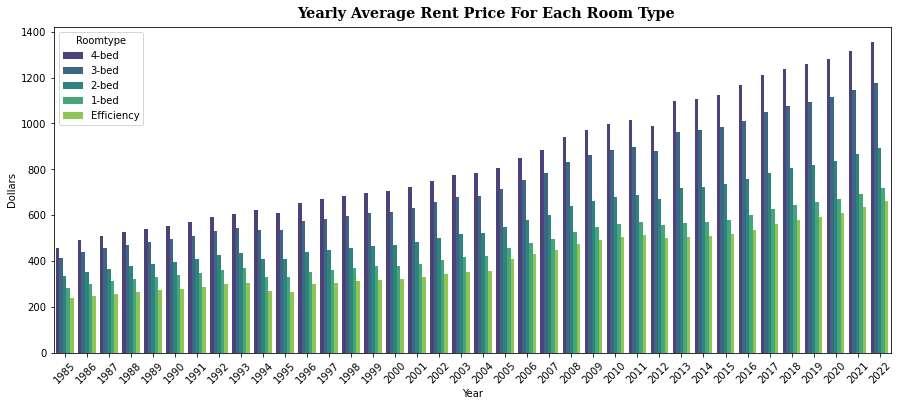

In [39]:
fig, ax = plt.subplots(1,1, figsize=(15,6))
sns.barplot(x='Year',y=0,hue='Roomtype',data=avg_pertype,palette='viridis')
ax.set_ylabel('Dollars')
ax.tick_params(axis='x',rotation=45)

fig.text(0.35,0.9,'Yearly Average Rent Price For Each Room Type',fontweight='bold',fontsize='x-large',ma='center',fontfamily='serif')

### What are the average rent prices for all areas across all categories in each year?

Text(0.35, 0.9, 'Yearly Average Rent Price')

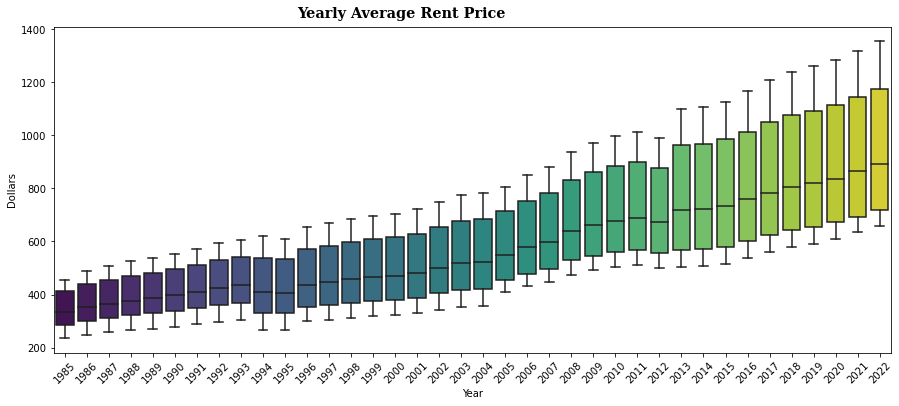

In [40]:
fig, ax = plt.subplots(1,1, figsize=(15,6))
sns.boxplot(x='Year',y=0,data=avg_pertype,palette='viridis')
ax.set_ylabel('Dollars')
ax.tick_params(axis='x',rotation=45)

fig.text(0.35,0.9,'Yearly Average Rent Price',fontweight='bold',fontsize='x-large',ma='center',fontfamily='serif')

### Is there any variation in distribution among the categories?

Text(0.35, 0.9, 'Average rent price per room category')

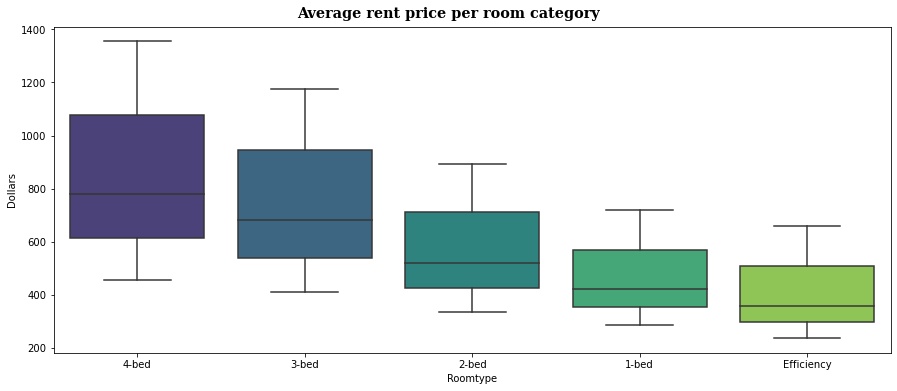

In [41]:
fig, ax = plt.subplots(1,1, figsize=(15,6))
sns.boxplot(x='Roomtype',y=0,data=avg_pertype,palette='viridis')
ax.set_ylabel('Dollars')

fig.text(0.35,0.9,'Average rent price per room category',fontweight='bold',fontsize='x-large',ma='center',fontfamily='serif')

We can see that average rent decreases steadily with decreasing number of rooms. Nothing seems out of the ordinary in the distribution of each category.

### What are the average rent prices across all categories for each area in each year?

Here, we can see the average rent price for each location. This is what is useful to consumers. This is what consumers will use to make decisions regarding where to rent. However, we have too many locations. We should see the most expensive and cheapest counties to rent, and we should aggregate further.

In [42]:
avg_price = rent_prices.groupby('Year').mean()
avg_price.head()

pmsaname Montgomery, AL MSA                Mobile, AL MSA Barbour County, AL  \
cntyname     Autauga County                Baldwin County     Barbour County   
areaname Montgomery, AL MSA Daphne-Fairhope-Foley, AL MSA Barbour County, AL   
Year                                                                           
1985                  287.0                         329.0              322.4   
1986                  349.6                         393.4              274.6   
1987                  357.0                         402.0              280.6   
1988                  366.6                         412.8              288.0   
1989                  371.6                         418.6              291.8   

pmsaname                          Bibb County, AL  \
cntyname                              Bibb County   
areaname Birmingham-Hoover, AL HUD Metro FMR Area   
Year                                                
1985                                        334.4   
1986                                        266.8   
1987                                        272.8   
1988                                        280.2   
1989                                        284.0   

pmsaname                       Birmingham, AL MSA Bullock County, AL  \
cntyname                            Blount County     Bullock County   
areaname Birmingham-Hoover, AL HUD Metro FMR Area Bullock County, AL   
Year                                                                   
1985                                        349.4              287.0   
1986                                        379.0              258.8   
1987                                        387.4              286.2   
1988                                        397.8              293.6   
1989                                        386.0              297.4   

pmsaname Butler County, AL                     Anniston, AL MSA  \
cntyname     Butler County                       Calhoun County   
areaname Butler County, AL Anniston-Oxford-Jacksonville, AL MSA   
Year                                                              
1985                 322.4                                309.4   
1986                 258.8                                323.6   
1987                 264.6                                331.0   
1988                 298.6                                339.8   
1989                 302.8                                344.4   

pmsaname Chambers County, AL Cherokee County, AL  ...  \
cntyname     Chambers County     Cherokee County  ...   
areaname Chambers County, AL Cherokee County, AL  ...   
Year                                              ...   
1985                   326.2               264.2  ...   
1986                   271.8               271.8  ...   
1987                   277.8               277.8  ...   
1988                   285.2               285.2  ...   
1989                   289.0               289.0  ...   

pmsaname       Puerto Rico HUD Nonmetro FMR Area  \
cntyname                        Utuado Municipio   
areaname Utuado Municipio, PR HUD Metro FMR Area   
Year                                               
1985                                       303.8   
1986                                       323.0   
1987                                       323.0   
1988                                       323.0   
1989                                       323.0   

pmsaname               San Juan--Bayamón, PR PMSA  \
cntyname                      Vega Alta Municipio   
areaname San Juan-Guaynabo, PR HUD Metro FMR Area   
Year                                                
1985                                        455.0   
1986                                        478.0   
1987                                        478.0   
1988                                        478.0   
1989                                        478.0   

pmsaname                                           \
cntyname                      Vega

### What are the 10 most/least expensive areas to rent in per year? How often do the same locations show up?

First, let's transpose our data for better visualisation

In [43]:
rank_avg = avg_price.T
rank_avg.head()

,,Year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
pmsaname,cntyname,areaname,,,,,,,,,,,,,,,,,,,,,
"Montgomery, AL MSA",Autauga County,"Montgomery, AL MSA",287.0,349.6,357.0,366.6,371.6,379.6,389.2,402.6,413.4,514.6,...,892.2,802.0,890.2,873.0,914.0,922.8,916.2,917.4,996.4,994.2
"Mobile, AL MSA",Baldwin County,"Daphne-Fairhope-Foley, AL MSA",329.0,393.4,402.0,412.8,418.6,427.6,438.6,453.4,465.8,446.4,...,830.2,942.2,868.0,1018.0,1137.4,1024.2,1034.0,1045.2,1039.2,1125.8
"Barbour County, AL",Barbour County,"Barbour County, AL",322.4,274.6,280.6,288.0,291.8,298.2,305.6,315.8,323.2,310.6,...,590.4,589.4,677.2,648.8,694.8,679.0,689.6,661.0,668.2,724.8
"Bibb County, AL",Bibb County,"Birmingham-Hoover, AL HUD Metro FMR Area",334.4,266.8,272.8,280.2,284.0,290.0,297.4,307.2,314.6,351.6,...,838.4,793.6,825.4,912.6,948.6,966.6,955.6,1073.4,1080.4,1012.8
"Birmingham, AL MSA",Blount County,"Birmingham-Hoover, AL HUD Metro FMR Area",349.4,379.0,387.4,397.8,386.0,394.2,419.2,433.4,445.2,481.8,...,838.4,793.6,825.4,912.6,948.6,966.6,955.6,1073.4,1080.4,1012.8


**The function below returns the top ten locations with highest rent prices for each year.**

We observe that there are several repeated areas across the years. 

In [44]:
def high(df):
    names = []
    years = df.columns.tolist()
    for year in years:
        values = df.nlargest(10,year).index.tolist()
        names.append(values)
    highest_ten = pd.DataFrame(dict(zip(df.columns,names)), index = list(range(1,11)))
    return highest_ten
highest_ten = high(rank_avg)
highest_ten
#this function first extracts the years into a list.
#it then finds the index of the 10 most expensive location per year
#it then creates a dataframe to better visualise the data

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,"(Burlington-South Burlington, VT MSA, Burlingt...","(Burlington-South Burlington, VT MSA, Burlingt...","(Burlington-South Burlington, VT MSA, Burlingt...","(Burlington-South Burlington, VT MSA, Burlingt...","(Burlington-South Burlington, VT MSA, Burlingt...","(San Francisco, CA PMSA, Marin County, San Fra...","(Stamford--Norwalk, CT PMSA, Fairfield County,...","(Stamford--Norwalk, CT PMSA, Fairfield County,...","(Stamford--Norwalk, CT PMSA, Fairfield County,...","(Tulsa, OK MSA, Creek County, Tulsa, OK HUD Me...",...,"(Honolulu, HI MSA, Honolulu County, Urban Hono...","(San Francisco, CA PMSA, Marin County, San Fra...","(San Francisco, CA PMSA, Marin County, San Fra...","(San Francisco, CA PMSA, Marin County, San Fra...","(San Francisco, CA PMSA, Marin County, San Fra...","(San Francisco, CA PMSA, Marin County, San Fra...","(San Jose, CA PMSA, Santa Clara County, San Jo...","(San Francisco, CA PMSA, Marin County, San Fra...","(San Francisco, CA PMSA, Marin County, San Fra...","(San Francisco, CA PMSA, Marin County, San Fra..."
2,"(Hoonah-Angoon Census Area, AK, Hoonah-Angoon ...","(Hoonah-Angoon Census Area, AK, Hoonah-Angoon ...","(Hoonah-Angoon Census Area, AK, Hoonah-Angoon ...","(San Francisco, CA PMSA, Marin County, San Fra...","(San Francisco, CA PMSA, Marin County, San Fra...","(San Francisco, CA PMSA, San Francisco County,...","(San Francisco, CA PMSA, Marin County, San Fra...","(San Francisco, CA PMSA, Marin County, San Fra...","(San Francisco, CA PMSA, Marin County, San Fra...","(Tulsa, OK MSA, Osage County, Tulsa, OK HUD Me...",...,"(San Francisco, CA PMSA, Marin County, San Fra...","(San Francisco, CA PMSA, San Francisco County,...","(San Francisco, CA PMSA, San Francisco County,...","(San Francisco, CA PMSA, San Francisco County,...","(San Francisco, CA PMSA, San Francisco County,...","(San Francisco, CA PMSA, San Francisco County,...","(San Francisco, CA PMSA, Marin County, San Fra...","(San Francisco, CA PMSA, San Francisco County,...","(San Francisco, CA PMSA, San Francisco County,...","(San Francisco, CA PMSA, San Francisco County,..."
3,"(Petersburg Census Area, AK, Petersburg Census...","(Petersburg Census Area, AK, Petersburg Census...","(Petersburg Census Area, AK, Petersburg Census...","(San Francisco, CA PMSA, San Francisco County,...","(San Francisco, CA PMSA, San Francisco County,...","(San Francisco, CA PMSA, San Mateo County, San...","(San Francisco, CA PMSA, San Francisco County,...","(San Francisco, CA PMSA, San Francisco County,...","(San Francisco, CA PMSA, San Francisco County,...","(Tulsa, OK MSA, Rogers County, Tulsa, OK HUD M...",...,"(San Francisco, CA PMSA, San Francisco County,...","(San Francisco, CA PMSA, San Mateo County, San...","(San Francisco, CA PMSA, San Mateo County, San...","(San Francisco, CA PMSA, San Mateo County, San...","(San Francisco, CA PMSA, San Mateo County, San...","(San Francisco, CA PMSA, San Mateo County, San...","(San Francisco, CA PMSA, San Francisco County,...","(San Francisco, CA PMSA, San Mateo County, San...","(San Francisco, CA PMSA, San Mateo County, San...","(San Francisco, CA PMSA, San Mateo County, San..."
4,"(Prince of Wales-Hyder Census Area, AK, Prince...","(Prince of Wales-Hyder Census Area, AK, Prince...","(Prince of Wales-Hyder Census Area, AK, Prince...","(San Francisco, CA PMSA, San Mateo County, San...","(San Francisco, CA PMSA, San Mateo County, San...","(Stamford--Norwalk, CT PMSA, Fairfield County,...","(San Francisco, CA PMSA, San Mateo County, San...","(San Francisco, CA PMSA, San Mateo County, San...","(San Francisco, CA PMSA, San Mateo County, San...","(Tulsa, OK MSA, Tulsa County, Tulsa, OK HUD Me...",...,"(San Francisco, CA PMSA, San Mateo County, San...","(Honolulu, HI MSA, Honolulu County, Urban Hono...","(Stamford--Norwalk, CT PMSA, Fairfield County,...","(Oakland, CA PMSA, Alameda County, Oakland-Fre...","(San Jose, CA PMSA, Sa

We repeat the same analysis but to see the cheapest areas

In [45]:
def low(g):
    names = []
    years = g.columns.tolist()
    for year in years:
        values = g.nsmallest(10,year).index.tolist()
        names.append(values)
    lowest_ten = pd.DataFrame(dict(zip(g.columns,names)), index = list(range(1,11)))
    return lowest_ten
lowest_ten = low(rank_avg)
lowest_ten


,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,"(Meigs County, OH, Meigs County, Meigs County,...","(St. Louis, MO-IL MSA, Sullivan part, St. Loui...","(St. Louis, MO-IL MSA, Sullivan part, St. Loui...","(St. Louis, MO-IL MSA, Sullivan part, St. Loui...","(St. Louis, MO-IL MSA, Sullivan part, St. Loui...","(St. Louis, MO-IL MSA, Sullivan part, St. Loui...","(East Carroll Parish, LA, East Carroll Parish,...","(East Carroll Parish, LA, East Carroll Parish,...","(East Carroll Parish, LA, East Carroll Parish,...","(Blaine County, NE, Blaine County, Blaine Coun...",...,"(Northern Mariana Islands, Northern Mariana Is...","(Northern Mariana Islands, Northern Mariana Is...","(Northern Mariana Islands, Northern Mariana Is...","(Puerto Rico HUD Nonmetro FMR Area, Adjuntas M...","(Puerto Rico HUD Nonmetro FMR Area, Utuado Mun...","(Puerto Rico HUD Nonmetro FMR Area, Adjuntas M...","(Puerto Rico HUD Nonmetro FMR Area, Aibonito M...","(Puerto Rico HUD Nonmetro FMR Area, Aibonito M...","(Puerto Rico HUD Nonmetro FMR Area, Aibonito M...","(Puerto Rico HUD Nonmetro FMR Area, Guánica Mu..."
2,"(St. Louis, MO-IL MSA, Sullivan part, St. Loui...","(Cibola County, NM, Cibola County, Cibola Coun...","(Caldwell Parish, LA, Caldwell Parish, Caldwel...","(East Carroll Parish, LA, East Carroll Parish,...","(East Carroll Parish, LA, East Carroll Parish,...","(East Carroll Parish, LA, East Carroll Parish,...","(Franklin Parish, LA, Franklin Parish, Frankli...","(Franklin Parish, LA, Franklin Parish, Frankli...","(Franklin Parish, LA, Franklin Parish, Frankli...","(East Carroll Parish, LA, East Carroll Parish,...",...,"(American Samoa, American Samoa, American Samoa)","(Puerto Rico HUD Nonmetro FMR Area, Adjuntas M...","(Puerto Rico HUD Nonmetro FMR Area, Aibonito M...","(Puerto Rico HUD Nonmetro FMR Area, Coamo Muni...","(Arecibo, PR PMSA, Arecibo Municipio, Arecibo,...","(Puerto Rico HUD Nonmetro FMR Area, Coamo Muni...","(Puerto Rico HUD Nonmetro FMR Area, Barranquit...","(Puerto Rico HUD Nonmetro FMR Area, Barranquit...","(Puerto Rico HUD Nonmetro FMR Area, Barranquit...","(Ponce, PR MSA, Guayanilla Municipio, Yauco, P..."
3,"(Cibola County, NM, Cibola County, Cibola Coun...","(Caldwell Parish, LA, Caldwell Parish, Caldwel...","(East Carroll Parish, LA, East Carroll Parish,...","(Franklin Parish, LA, Franklin Parish, Frankli...","(Franklin Parish, LA, Franklin Parish, Frankli...","(Franklin Parish, LA, Franklin Parish, Frankli...","(Jackson Parish, LA, Jackson Parish, Jackson P...","(Jackson Parish, LA, Jackson Parish, Jackson P...","(Jackson Parish, LA, Jackson Parish, Jackson P...","(Calhoun County, GA, Calhoun County, Calhoun C...",...,"(Mayagüez, PR MSA, Cabo Rojo Municipio, San Ge...","(Puerto Rico HUD Nonmetro FMR Area, Coamo Muni...","(Puerto Rico HUD Nonmetro FMR Area, Barranquit...","(Puerto Rico HUD Nonmetro FMR Area, Culebra Mu...","(Arecibo, PR PMSA, Camuy Municipio, Arecibo, P...","(Puerto Rico HUD Nonmetro FMR Area, Culebra Mu...","(Puerto Rico HUD Nonmetro FMR Area, Ciales Mun...","(Puerto Rico HUD Nonmetro FMR Area, Ciales Mun...","(Puerto Rico HUD Nonmetro FMR Area, Ciales Mun...","(Ponce, PR MSA, Peñuelas Municipio, Yauco, PR ..."
4,"(Little River County, AR, Little River County,...","(East Carroll Parish, LA, East Carroll Parish,...","(Franklin Parish, LA, Franklin Parish, Frankli...","(Jackson Parish, LA, Jackson Parish, Jackson P...","(Jackson Parish, LA, Jackson Parish, Jackson P...","(Jackson Parish, LA, Jackson Parish, Jackson P...","(Madison Parish, LA, Madison Parish, Madison P...","(Madison Parish, LA, Madison Parish, Madison P...","(Madison Parish, LA, Madison Parish, Madison P...","(Greene County, AL, Greene County, Greene Coun...",...,"(Puerto Rico HUD Nonmetro FMR Area, Lajas Muni...","(Puerto Rico HUD Nonmetro FMR Area, Culebra Mu...","(Puerto Rico HUD Nonmetro FMR Area, Ciales Mun...","(Puerto Rico HUD Nonmetro FMR Area, Jayuya Mun...","(Arecibo, PR PMSA, Hati

We want to know the locations that are most frequently repeated. This result means that these locations are consistently among the most expensive /cheapest areas to rent in the United States.

In [46]:
high_freq = pd.DataFrame(highest_ten.apply(pd.value_counts).fillna(0).sum(axis=1).sort_values(ascending = False),
             columns =['Frequency'])
high_freq.index.set_names(['pmsaname','cntyname','areaname'],inplace=True)
high_freq = high_freq.reset_index().groupby('pmsaname').mean().nlargest(20,columns='Frequency').reset_index()

low_freq = pd.DataFrame(lowest_ten.apply(pd.value_counts).fillna(0).sum(axis=1).sort_values(ascending = False),
             columns =['Frequency'])
low_freq.index.set_names(['pmsaname','cntyname','areaname'],inplace=True)
low_freq = low_freq.reset_index().groupby('pmsaname').mean().nlargest(20,columns='Frequency').reset_index()

Text(0.35, 0.48, 'Cheap Areas to Rent in')

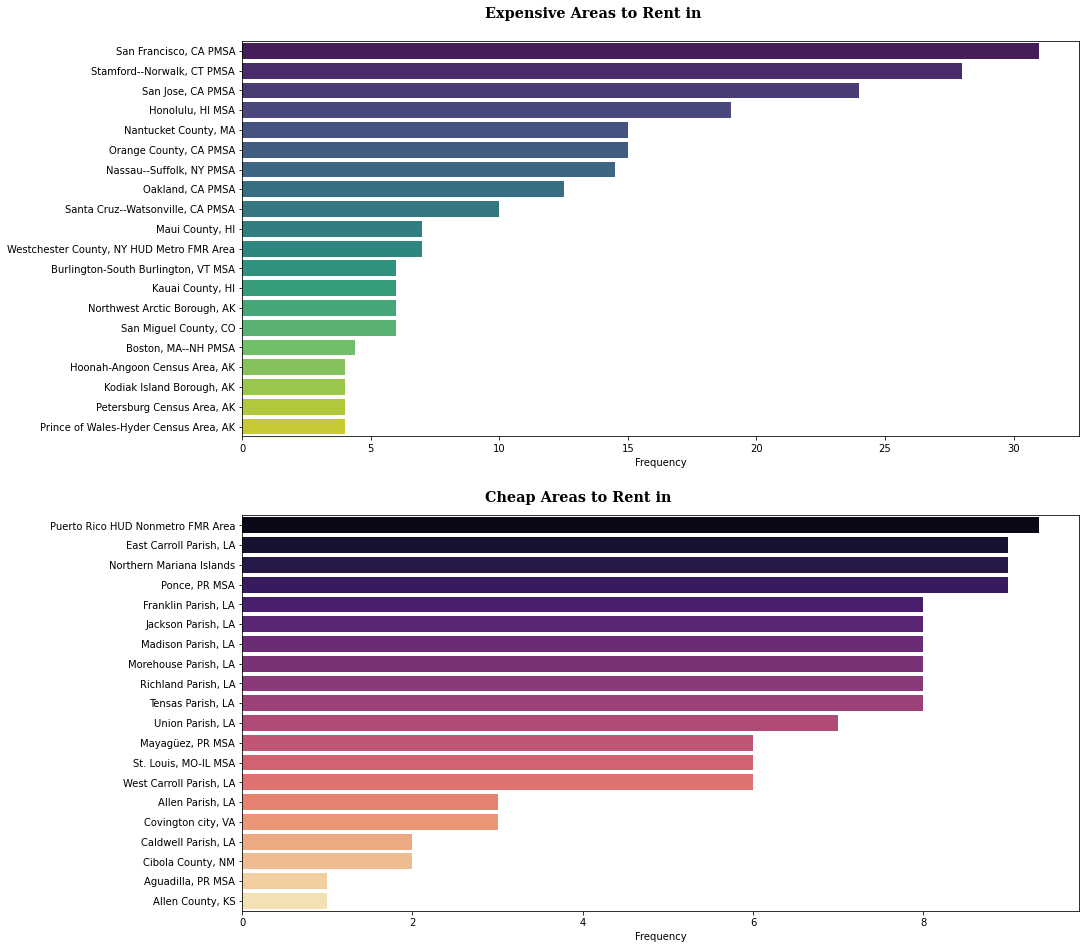

In [47]:
fig, ax = plt.subplots(2,1,figsize=(15,16))

sns.barplot(x='Frequency',y='pmsaname',data=high_freq,palette='viridis',orient='h',ax=ax[0]).set(ylabel=None)
fig.text(0.35,0.9,'Expensive Areas to Rent in',fontweight='bold',fontsize='x-large',ma='center',fontfamily='serif')

sns.barplot(x='Frequency',y='pmsaname',data=low_freq,palette='magma',orient='h',ax=ax[1]).set(ylabel=None)
fig.text(0.35,0.48,'Cheap Areas to Rent in',fontweight='bold',fontsize='x-large',ma='center',fontfamily='serif')


We can see that San Francisco, CA area is the most consistent expensive area to rent in, with three counties in the area being the most frequent member of top 10 most expensive over the years.

We can see that the most consistent cheapest places to rent in the USA are in Puerto Rico and some districts in LA.

### What areas have had the largest changes in rent price in the last 10 years?

Text(0.35, 0.48, 'Areas with fastest declining rent since 2011')

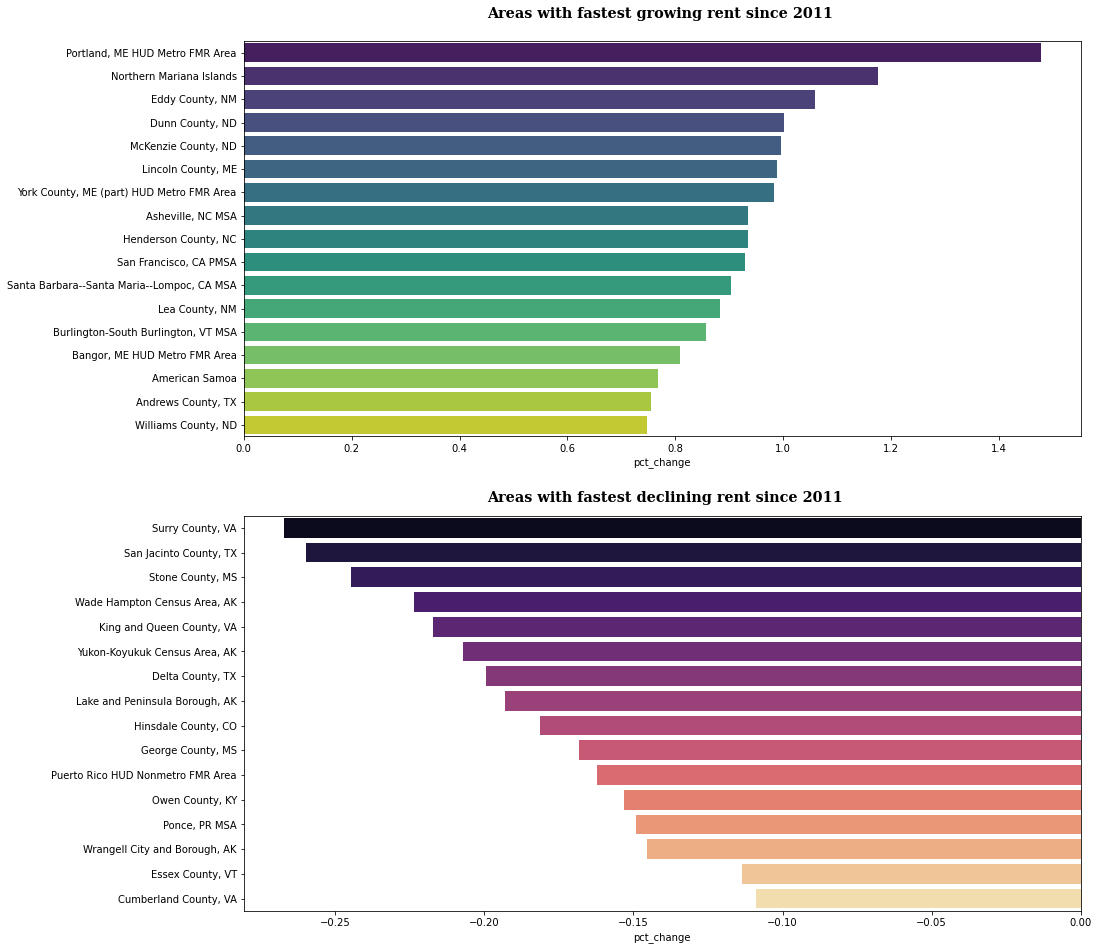

In [48]:
pmsa_rent = avg_price.T.reset_index().drop(columns =['cntyname','areaname'])

fastest20 = pmsa_rent.assign(pct_change = lambda x: (x[2021] - x[2011])/x[2011])\
             [['pmsaname','pct_change',2011,2021]].nlargest(20,'pct_change')
lowest20 = pmsa_rent.assign(pct_change = lambda x: (x[2021] - x[2011])/x[2011])\
             [['pmsaname','pct_change',2011,2021]].query('pct_change <= 0').nsmallest(20,'pct_change')

fig, ax = plt.subplots(2,1,figsize=(15,16))
sns.barplot(x='pct_change',y='pmsaname',data=fastest20,palette='viridis',orient='h',ax=ax[0]).set(ylabel=None)
fig.text(0.35,0.9,'Areas with fastest growing rent since 2011',fontweight='bold',fontsize='x-large',ma='center',fontfamily='serif')
sns.barplot(x='pct_change',y='pmsaname',data=lowest20,palette='magma',orient='h',ax=ax[1]).set(ylabel=None)
fig.text(0.35,0.48,'Areas with fastest declining rent since 2011',fontweight='bold',fontsize='x-large',ma='center',fontfamily='serif')

Here we can see the quantiles of pct_change. This shows that 75% of all locations have changed rent price by at least 33% , and more than 25% have changed rent price by 18% in the last 10 years.

In [49]:
pmsa_rent.assign(pct_change = lambda x: (x[2021] - x[2011])/x[2011])\
             ['pct_change'].quantile([0.25,0.75])

0.25    0.185467
0.75    0.327218
Name: pct_change, dtype: float64

### Analysis by State

Let us group by state level and redo our analysis. We want to see the cheapest and most expensive areas to rent in by state.

We are going to create a states column by extracting the state codes in the pmsaname column.

First, we import a document containing states and their codes

In [50]:
state_codes = pd.read_csv('state_codes.csv')
state_codes.head()

,State,Postal
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


Then, we extract the codes from the pmsaname column and map them to the State information, thereby creating a new column

In [51]:
#convert the states codes file to a dictionary for easy function building
states_dict = dict(zip(state_codes.State,state_codes.Postal))

#remove all capital letters that could cause errors during mapping.
#the only capital letters left are state codes.
extract = pmsa_rent.pmsaname.tolist()
extract = [s.replace("PMSA","") for s in extract]
extract = [s.replace("MSA","") for s in extract]
extract = [s.replace(" HUD Nonmetro FMR Area","") for s in extract]
pmsa_rent['pmsaname'] = extract

#here we've successfully mapped the states to the codes from pmsaname
#this new dataframe will be merged with our orginal dataframe
states = pd.DataFrame([(state,s) for state,code in states_dict.items() for s in extract if code in s],columns=['State','pmsaname'])

#we use an outer merge so we can see the states that did not map
pmsa_rent = pmsa_rent.merge(states,how='outer',on='pmsaname')

Let's see the rows with null State values

In [52]:
pmsa_rent[pmsa_rent.State.isnull()]

,pmsaname,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,State
9315,American Samoa,485.0,485.0,485.0,485.0,485.0,485.0,485.0,485.0,485.0,...,485.0,485.0,715.8,742.0,755.0,793.4,821.2,857.8,889.4,NaN
9316,Pacific Islands,510.8,541.0,567.0,590.4,608.0,627.8,651.2,770.0,946.8,...,1212.6,1230.0,1070.0,1109.4,1131.0,1188.0,1229.6,1580.8,1638.6,NaN
9317,Northern Mariana Islands,396.0,396.0,396.0,396.0,396.0,396.0,396.0,396.0,396.0,...,396.0,396.0,712.2,738.8,754.4,794.6,824.2,861.8,889.0,NaN
9318,Puerto Rico,303.8,323.0,323.0,323.0,323.0,323.0,323.0,323.0,323.0,...,434.0,438.6,421.2,459.6,414.4,461.0,452.4,467.0,528.4,NaN
9319,Puerto Rico,303.8,323.0,323.0,323.0,323.0,323.0,323.0,323.0,323.0,...,444.0,434.6,425.4,485.2,436.6,445.0,433.8,444.8,469.6,NaN
9320,Puerto Rico,303.8,323.0,323.0,323.0,323.0,323.0,323.0,323.0,323.0,...,518.2,553.0,441.6,465.6,438.2,458.8,457.6,458.2,469.0,NaN
9321,Puerto Rico,303.8,323.0,323.0,323.0,323.0,323.0,323.0,323.0,323.0,...,444.0,434.6,425.4,485.2,436.6,445.0,433.8,444.8,469.6,NaN
9322,Puerto Rico,303.8,323.0,323.0,323.0,323.0,323.0,323.0,323.0,323.0,...,444.0,434.6,425.4,485.2,436.6,445.0,433.8,444.8,469.6,NaN
9323,Puerto Rico,303.8,323.0,323.0,323.0,323.0,323.0,323.0,323.0,323.0,...,434.0,438.6,421.2,459.6,414.4,461.0,452.4,467.0,472.4,NaN
9324,Puerto Rico,303.8,323.0,323.0,323.0,323.0,323.0,323.0,323.0,323.0,...,434.0,438.6,421.2,459.6,414.4,461.0,452.4,467.0,472.4,NaN


We can easily fill in the remaining regions of Puerto Rico, American Samoa, Pacific Islands, and Northern Mariana Islands

In [53]:
pmsa_rent.State.fillna(pmsa_rent.pmsaname,inplace=True)

Now we can group by state and begin our analysis

In [54]:
pmsa_year = pmsa_rent.groupby('State').mean()
pmsa_year.head()

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
State,,,,,,,,,,,,,,,,,,,,,
Alabama,318.683636,322.854545,331.145455,340.289091,343.210909,350.550909,361.772727,373.805455,383.403636,400.994545,...,739.358182,714.423636,751.796364,764.732727,807.698182,808.969091,823.750909,826.821818,853.780000,878.392727
Alaska,637.110345,712.834483,712.834483,712.834483,665.862069,661.462069,681.468966,704.158621,723.241379,766.744828,...,1111.482759,1026.075862,1126.786207,1157.068966,1293.724138,1279.875862,1310.524138,1364.565517,1280.096552,1314.744828
American Samoa,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,...,485.000000,485.000000,485.000000,715.800000,742.000000,755.000000,793.400000,821.200000,857.800000,889.400000
Arizona,382.928000,435.048000,463.944000,485.040000,498.808000,513.712000,530.640000,548.784000,556.920000,562.096000,...,899.280000,897.880000,893.656000,917.000000,910.240000,950.496000,980.960000,1035.648000,1081.552000,1163.896000
Arkansas,302.227642,329.660163,337.655285,347.052033,356.717073,364.435772,373.785366,386.663415,395.456911,406.559350,...,720.694309,705.546341,736.273171,753.959350,769.788618,780.783740,805.839024,798.095935,828.606504,830.944715


### What are the 10 most/least expensive states to rent in per year? How often do the same locations show up?

In [55]:
state_high = high(pmsa_year)
state_low = low(pmsa_year)

state_highfreq = pd.DataFrame(state_high.apply(pd.value_counts).fillna(0).sum(axis=1).sort_values(ascending = False),
            columns =['Frequency'])
state_highfreq.index.set_names(['State'],inplace=True)
state_highfreq = state_highfreq.nlargest(10,columns='Frequency').reset_index()

state_lowfreq = pd.DataFrame(state_low.apply(pd.value_counts).fillna(0).sum(axis=1).sort_values(ascending = False),
            columns =['Frequency'])
state_lowfreq.index.set_names(['State'],inplace=True)
state_lowfreq = state_lowfreq.nlargest(10,columns='Frequency').reset_index()


Text(0.35, 0.48, 'Cheap States to Rent in')

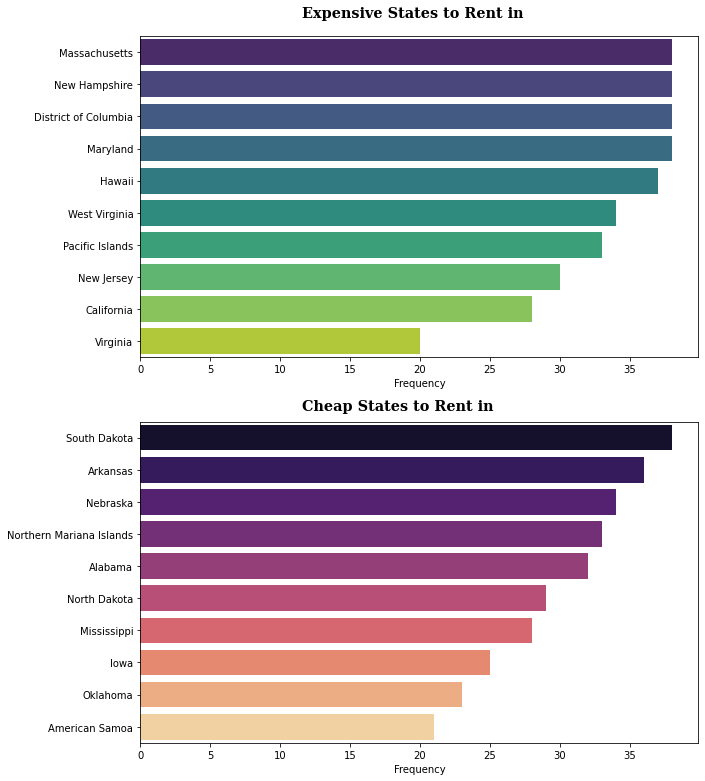

In [56]:
fig, ax = plt.subplots(2,1,figsize=(10,13))

sns.barplot(x='Frequency',y='State',data=state_highfreq,palette='viridis',orient='h',ax=ax[0]).set(ylabel=None)
fig.text(0.35,0.9,'Expensive States to Rent in',fontweight='bold',fontsize='x-large',ma='center',fontfamily='serif')

sns.barplot(x='Frequency',y='State',data=state_lowfreq,palette='magma',orient='h',ax=ax[1]).set(ylabel=None)
fig.text(0.35,0.48,'Cheap States to Rent in',fontweight='bold',fontsize='x-large',ma='center',fontfamily='serif')


### What states have had the largest changes in rent price in the last 10 years?

Text(0.35, 0.48, 'States with fastest declining rent since 2011')

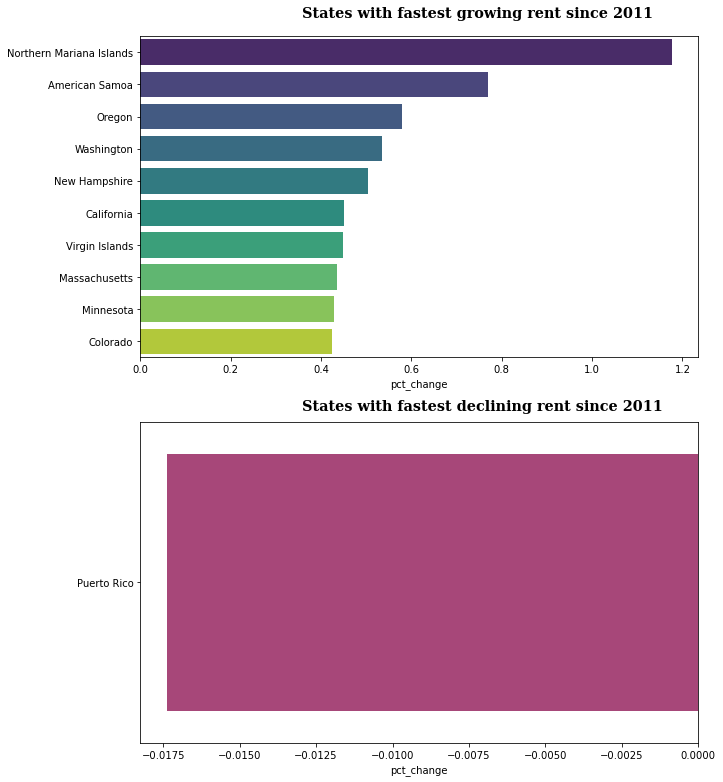

In [57]:
states_fast20 = pmsa_year.assign(pct_change = lambda x: (x[2021] - x[2011])/x[2011])\
             [['pct_change',2011,2021]].nlargest(10,'pct_change')
states_fast20
states_low20 = pmsa_year.assign(pct_change = lambda x: (x[2021] - x[2011])/x[2011])\
             [['pct_change',2011,2021]].query('pct_change <= 0').nsmallest(10,'pct_change')

fig, ax = plt.subplots(2,1,figsize=(10,13))
sns.barplot(x='pct_change',y='State',data=states_fast20.reset_index(),palette='viridis',orient='h',ax=ax[0]).set(ylabel=None)
fig.text(0.35,0.9,'States with fastest growing rent since 2011',fontweight='bold',fontsize='x-large',ma='center',fontfamily='serif')
sns.barplot(x='pct_change',y='State',data=states_low20.reset_index(),palette='magma',orient='h',ax=ax[1]).set(ylabel=None)
fig.text(0.35,0.48,'States with fastest declining rent since 2011',fontweight='bold',fontsize='x-large',ma='center',fontfamily='serif')

Here we can see the quantiles of pct_change. This shows that 75% of all states have changed rent price by at least 36% , and more than 25% have changed rent price by 22% in the last 10 years.

In [58]:
pmsa_year.assign(pct_change = lambda x: (x[2021] - x[2011])/x[2011])\
             ['pct_change'].quantile([0.25,0.75])

0.25    0.223169
0.75    0.362619
Name: pct_change, dtype: float64